In [1]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

train = pd.read_excel("../Project/output/project_dataset.xls")
train

,Unnamed: 0,propertyCode,numPhotos,floor,price,propertyType,size,exterior,rooms,bathrooms,...,hasPlan,has3DTour,has360,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice,preciom2,criminality_ratio,mean_price_munimadrid,education_centers_ratio
0,0,94477419,2,1,114000,flat,53.0,False,1,1,...,False,False,False,False,False,0,2150,0.179886,4170.1250,0.369496
1,1,94474758,7,1,149000,flat,38.0,False,1,1,...,False,False,False,False,False,0,3921,0.179886,4170.1250,0.369496
2,2,94477419,2,1,114000,flat,53.0,False,1,1,...,False,False,False,False,False,0,2150,0.179886,4170.1250,0.369496
3,3,94474758,7,1,149000,flat,38.0,False,1,1,...,False,False,False,False,False,0,3921,0.179886,4170.1250,0.369496
4,4,94471119,49,1,500000,flat,125.0,True,3,2,...,True,False,False,True,True,0,4000,0.179886,4170.1250,0.369496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,3367,94304495,25,2,159000,flat,123.0,True,2,2,...,False,False,True,True,True,0,1292,0.400260,2104.0625,0.414555
3368,3368,94304043,8,2,199000,duplex,133.0,False,4,2,...,False,False,False,False,False,0,1496,0.400260,2104.0625,0.414555
3369,3369,94303103,25,2,139500,flat,99.0,True,3,2,...,False,False,False,False,False,0,1409,0.400260,2104.0625,0.414555
3370,3370,94301925,27,0,119000,flat,71.0,False,3,1,...,False,False,False,False,False,0,1676,0.400260,2104.0625,0.414555


### Data preprocessing

La tabla ya está procesada pero deberos comprobar que todo es correcto

In [2]:
#Delete 'Unnamed: 0'
train.drop(columns = ['Unnamed: 0'], inplace = True)

In [3]:
# Shape of dataset
print("Shape of training dataset:", train.shape)

Shape of training dataset: (3372, 27)


In [4]:
# checking null values
train.isnull().sum()

propertyCode                     0
numPhotos                        0
floor                            0
price                            0
propertyType                     0
size                             0
exterior                         0
rooms                            0
bathrooms                        0
district                         0
showAddress                      0
distance                         0
hasVideo                         0
status                           0
newDevelopment                   0
hasLift                          0
priceByArea                      0
hasPlan                          0
has3DTour                        0
has360                           0
hasParkingSpace                  0
isParkingSpaceIncludedInPrice    0
parkingSpacePrice                0
preciom2                         0
criminality_ratio                0
mean_price_munimadrid            0
education_centers_ratio          0
dtype: int64

### Exploratory data Analysis

In [5]:
train.columns

Index(['propertyCode', 'numPhotos', 'floor', 'price', 'propertyType', 'size',
       'exterior', 'rooms', 'bathrooms', 'district', 'showAddress', 'distance',
       'hasVideo', 'status', 'newDevelopment', 'hasLift', 'priceByArea',
       'hasPlan', 'has3DTour', 'has360', 'hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 'preciom2',
       'criminality_ratio', 'mean_price_munimadrid',
       'education_centers_ratio'],
      dtype='object')

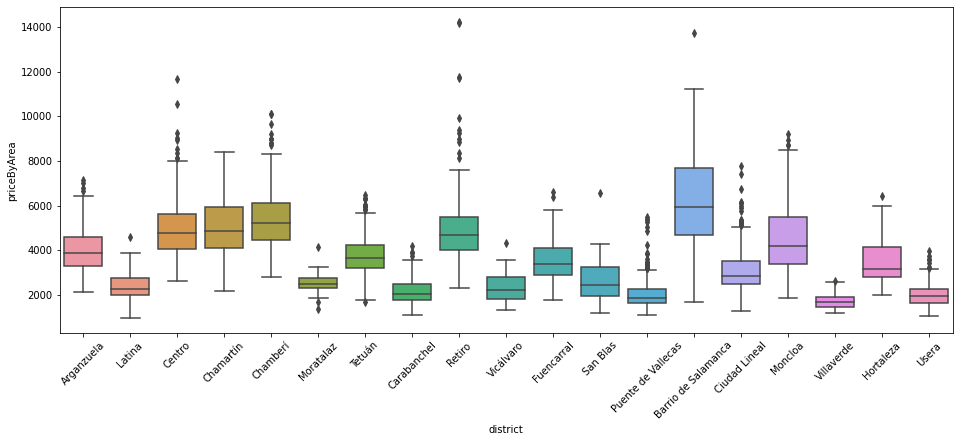

In [6]:
plt.figure(figsize = (16, 6))
sns.boxplot(x = 'district', y = 'priceByArea',  data = train)
plt.xticks(rotation=45)
plt.show()

### We delete columns if that column can't be fill in manual

In [7]:
train.columns

Index(['propertyCode', 'numPhotos', 'floor', 'price', 'propertyType', 'size',
       'exterior', 'rooms', 'bathrooms', 'district', 'showAddress', 'distance',
       'hasVideo', 'status', 'newDevelopment', 'hasLift', 'priceByArea',
       'hasPlan', 'has3DTour', 'has360', 'hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 'preciom2',
       'criminality_ratio', 'mean_price_munimadrid',
       'education_centers_ratio'],
      dtype='object')

In [8]:
train.drop(columns = ['propertyCode', 'priceByArea','distance', 'parkingSpacePrice', 'preciom2',
                     'mean_price_munimadrid',], inplace = True)

### Dict for categorical columns

In [9]:
#district
district_list=sorted(list(set(train.district)))
district_list_num=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
district_dict=dict(zip(district_list,district_list_num))
print(district_dict)

{'Arganzuela': 0, 'Barrio de Salamanca': 1, 'Carabanchel': 2, 'Centro': 3, 'Chamartín': 4, 'Chamberí': 5, 'Ciudad Lineal': 6, 'Fuencarral': 7, 'Hortaleza': 8, 'Latina': 9, 'Moncloa': 10, 'Moratalaz': 11, 'Puente de Vallecas': 12, 'Retiro': 13, 'San Blas': 14, 'Tetuán': 15, 'Usera': 16, 'Vicálvaro': 17, 'Villaverde': 18}


In [10]:
#status
status_list=list(set(train.status))
status_list_num=[0,1,2]
dict_status=dict(zip(status_list, status_list_num))
dict_status

{'renew': 0, 'newdevelopment': 1, 'good': 2}

In [11]:
#propertyType
propertyTypelist=list(set(train.propertyType))
propertyTypelist_num=[0,1,2,3,4]
dict_propertyType=dict(zip(propertyTypelist,propertyTypelist_num))
dict_propertyType

{'penthouse': 0, 'flat': 1, 'chalet': 2, 'duplex': 3, 'studio': 4}

In [12]:
dict_bool={True:0, False:1}

### Replace cat for numerical values with dict:

In [13]:
train['district'] = train['district'].replace(district_dict)
train['propertyType'] = train['propertyType'].replace(dict_propertyType)
train['status'] = train['status'].replace(dict_status)
train['exterior'] = train['exterior'].replace(dict_bool)
train['hasParkingSpace'] = train['hasParkingSpace'].replace(dict_bool)
train['isParkingSpaceIncludedInPrice'] = train['isParkingSpaceIncludedInPrice'].replace(dict_bool)
train['has3DTour'] = train['has3DTour'].replace(dict_bool)
train['has3DTour'] = train['has3DTour'].replace(dict_bool)

In [14]:
# Checking numeric_data & categorial_data
num_cols = list(train._get_numeric_data().columns)
print("Numerical columns: ", num_cols)

cat_cols=list(set(train.columns) - set(num_cols))
print("Categorical columns: ", cat_cols)

Numerical columns:  ['numPhotos', 'floor', 'price', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms', 'district', 'showAddress', 'hasVideo', 'status', 'newDevelopment', 'hasLift', 'hasPlan', 'has3DTour', 'has360', 'hasParkingSpace', 'isParkingSpaceIncludedInPrice', 'criminality_ratio', 'education_centers_ratio']
Categorical columns:  []


<AxesSubplot:>

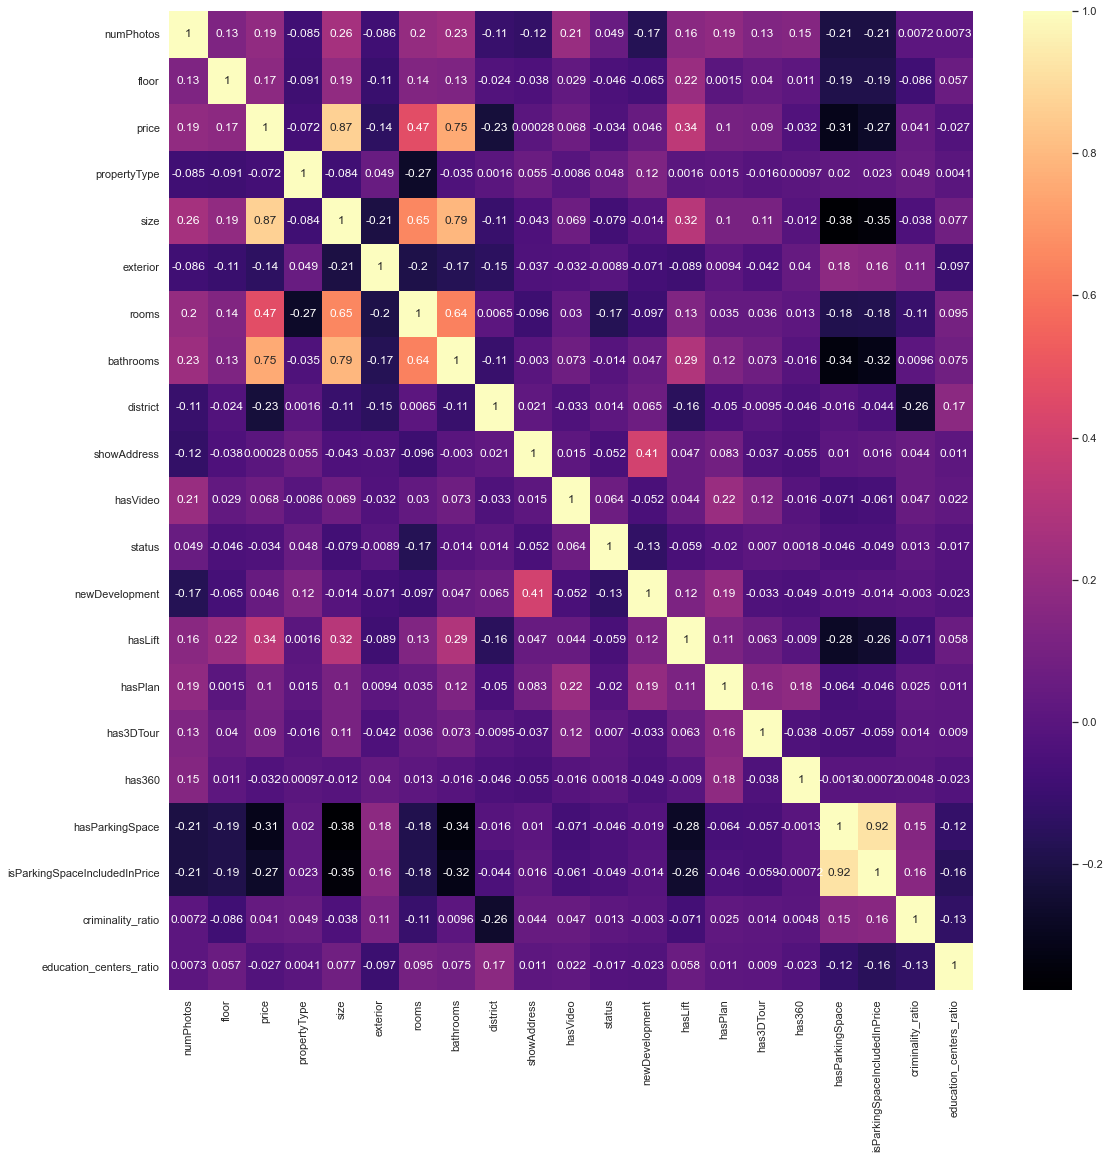

In [15]:
## Finding out correlation between features
sns.set(rc = {'figure.figsize':(18,18)})
sns.heatmap(train.corr(),annot = True, cmap = 'magma')

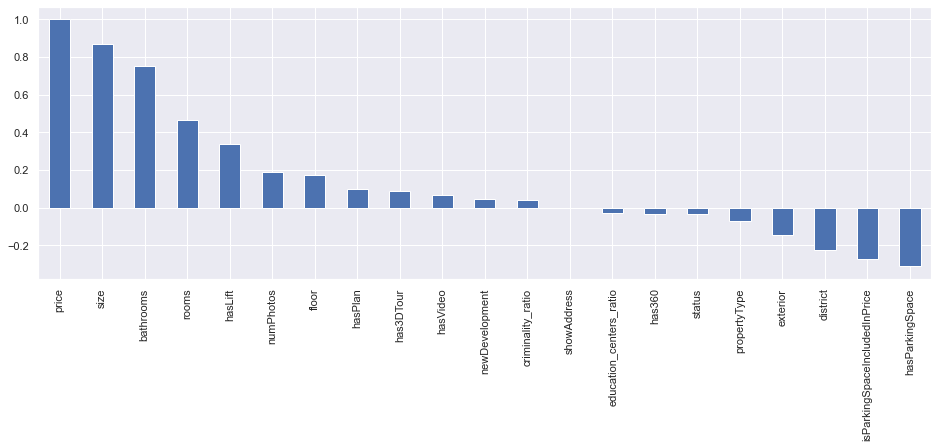

In [16]:
corr_mat=train.corr(method='pearson')
plt.figure(figsize = (16,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

In [17]:
train.columns

Index(['numPhotos', 'floor', 'price', 'propertyType', 'size', 'exterior',
       'rooms', 'bathrooms', 'district', 'showAddress', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'hasPlan', 'has3DTour', 'has360',
       'hasParkingSpace', 'isParkingSpaceIncludedInPrice', 'criminality_ratio',
       'education_centers_ratio'],
      dtype='object')

In [18]:
## we only keep columns with hight correlation
train.drop(columns = ['hasPlan', 'hasVideo','has3DTour', 'criminality_ratio', 'newDevelopment', 'showAddress',
                      'education_centers_ratio', 'has360','status','exterior','district',
                     'hasParkingSpace','propertyType','isParkingSpaceIncludedInPrice',], inplace = True)

<AxesSubplot:>

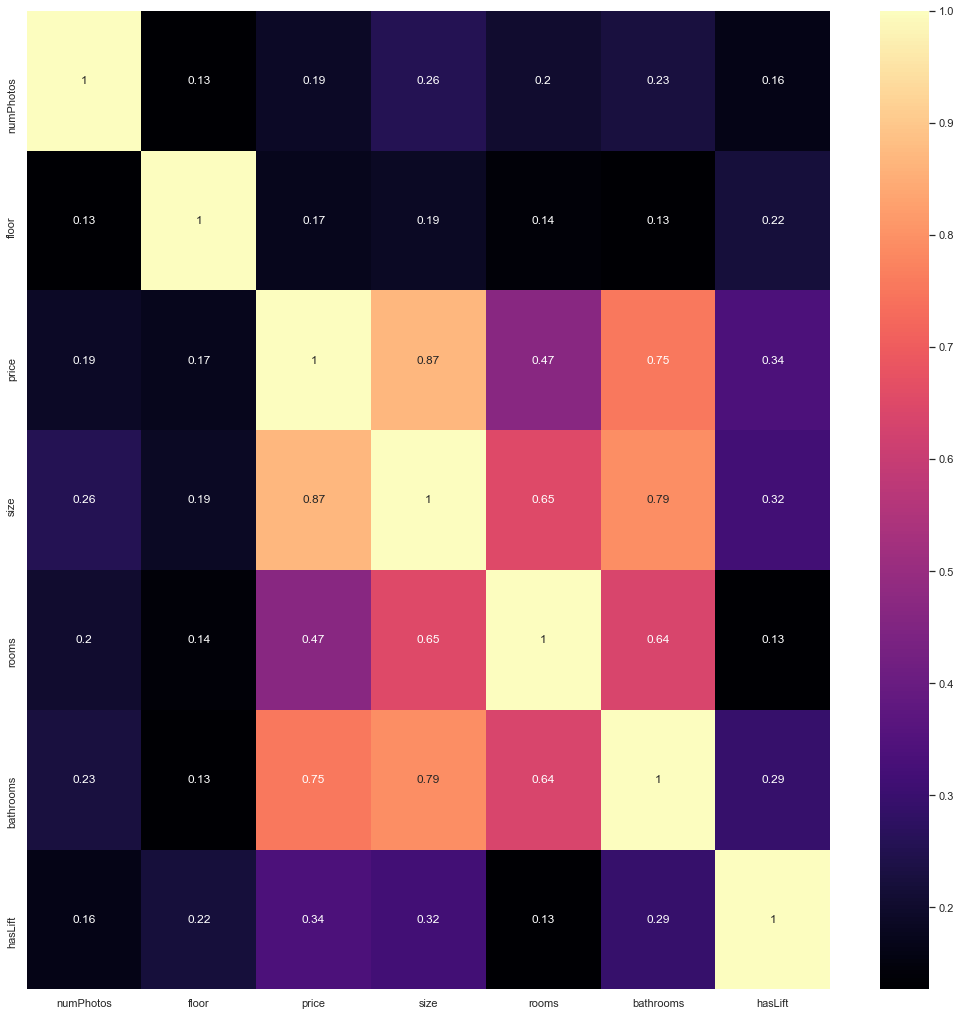

In [19]:
## Finding out correlation between features
sns.set(rc = {'figure.figsize':(18,18)})
sns.heatmap(train.corr(),annot = True, cmap = 'magma')

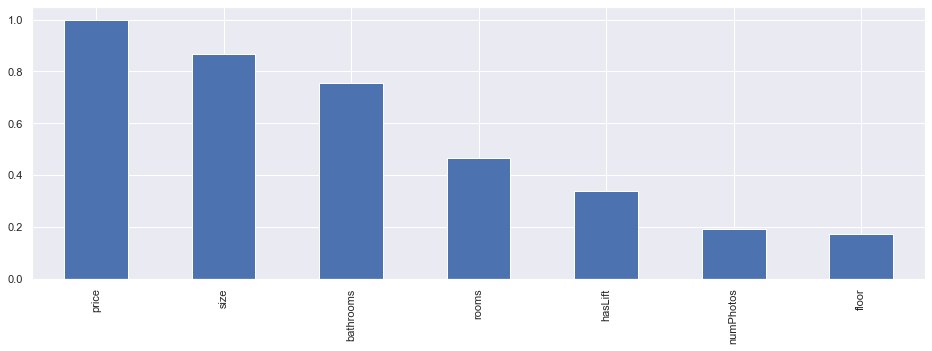

In [20]:
corr_mat=train.corr(method='pearson')
plt.figure(figsize = (16,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

### Feature selection

In [21]:
train.to_excel('../Project_idealista/input/df_train.xls')

In [22]:
columnas_train = [a for a in train.columns if a not in ["price"]]
X = train[columnas_train] #independent columns
y = np.round(train['price']) # target column, to be sure that the variable has int values

In [23]:
X.columns


Index(['numPhotos', 'floor', 'size', 'rooms', 'bathrooms', 'hasLift'], dtype='object')

### Model fitting

In [24]:
#Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=7)

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2360 entries, 395 to 175
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   numPhotos  2360 non-null   int64  
 1   floor      2360 non-null   int64  
 2   size       2360 non-null   float64
 3   rooms      2360 non-null   int64  
 4   bathrooms  2360 non-null   int64  
 5   hasLift    2360 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 129.1 KB


In [26]:
X_train.columns

Index(['numPhotos', 'floor', 'size', 'rooms', 'bathrooms', 'hasLift'], dtype='object')

In [27]:
print("shape X_train:",X_train.shape)
print("shape y_train:",y_train.shape)
print("shape X_test:",X_test.shape)
print("shape y_test:",y_test.shape)

shape X_train: (2360, 6)
shape y_train: (2360,)
shape X_test: (1012, 6)
shape y_test: (1012,)


# Model/values

In [28]:
testing_score=[]
training_score=[]
cv_results_rms = []
R2=[]
adj_R2=[]
MAE=[]
MSE=[]
RMSE=[]

# KNeighborsRegressor

In [29]:
KN = KNeighborsRegressor()
KN.fit(X_train, y_train)

KNeighborsRegressor()

### Model Fitting

In [30]:
y_pred= KN.predict(X_train)

### Training Accuracy Score

In [31]:
KN_training_score=KN.score(X_train , y_train)*100
training_score.append(KN_training_score.mean())

In [32]:
print("Training Accuracy: ", KN.score(X_train , y_train)*100)

Training Accuracy:  84.24086887709639


### Testing Accuracy Score

In [33]:
KN_testing_score=KN.score(X_train , y_train)*100
testing_score.append(KN_testing_score.mean())

In [34]:
print("Testing Accuracy:" , KN.score(X_test, y_test)*100)

Testing Accuracy: 72.22065163667033


### X_test pred

In [35]:
cv_score = cross_val_score(KN, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
cv_results_rms.append(cv_score.mean())
print("cross_val ","%s: %f " % ('KN', cv_score.mean()))

pred =KN.predict(X_test)

#R2
R2_metrics=metrics.r2_score(y_test, pred)
R2.append(R2_metrics.mean())
print("R2 ","%s: %f " % (KN,  R2_metrics.mean()))

#adj_R2
adj_R2_metrics=(1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
adj_R2.append(adj_R2_metrics.mean())
print("adj_R2 ","%s: %f " % (KN,  adj_R2_metrics.mean()))   

#MAE
MAE_metrics=metrics.mean_absolute_error(y_test, pred)
MAE.append(MAE_metrics.mean())
print("MAE", "%s: %f " % (KN,  MAE_metrics.mean()))  

#MSE    
MSE_metrics=metrics.mean_squared_error(y_test, pred)
MSE.append(MSE_metrics.mean())
print("MSE ","%s: %f " % (KN,  MSE_metrics.mean()))

#RMSE
RMSE_metrics=np.sqrt(metrics.mean_squared_error(y_test, pred))
RMSE.append(RMSE_metrics.mean())
print("RMSE ","%s: %f " % (KN, RMSE_metrics.mean()))    
print("RMSE ","%s: %f " % (KN, RMSE_metrics.mean()))    

cross_val  KN: -245665.754115 
R2  KNeighborsRegressor(): 0.722207 
adj_R2  KNeighborsRegressor(): 0.720548 
MAE KNeighborsRegressor(): 153351.272530 
MSE  KNeighborsRegressor(): 74265416710.684067 
RMSE  KNeighborsRegressor(): 272516.819134 
RMSE  KNeighborsRegressor(): 272516.819134 


### Model visualization

<function matplotlib.pyplot.show(close=None, block=None)>

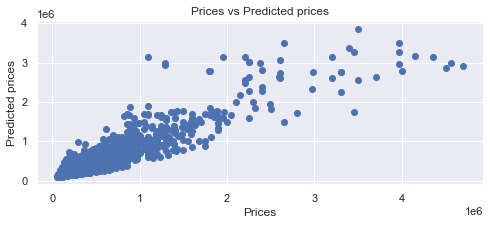

In [36]:
plt.figure(figsize=(8,3))
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show

### checking residuals

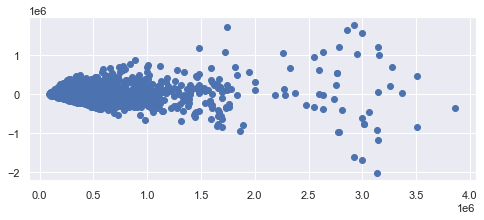

In [37]:
plt.figure(figsize=(8,3))
plt.scatter(y_pred, y_train-y_pred)

### checking normality of errors

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

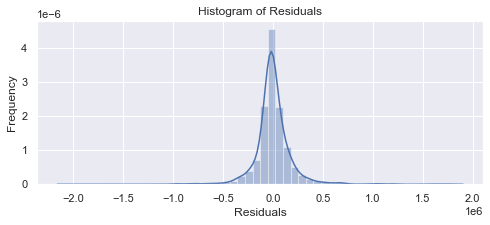

In [38]:
plt.figure(figsize=(8,3))
sns.distplot(y_train-y_pred)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel("Frequency")
plt.show

In [39]:
df_random = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df_random = df_random.sort_values('Actual')
df_random.head()

,Actual,Predicted
2169,58000,108400.0
2264,59000,99380.0
2260,60500,126400.0
205,69000,166780.0
1399,75000,133200.0


In [40]:
df_random_plot=df_random.sample(n=30, random_state=1)
df_random_plot = df_random_plot.sort_values('Actual')

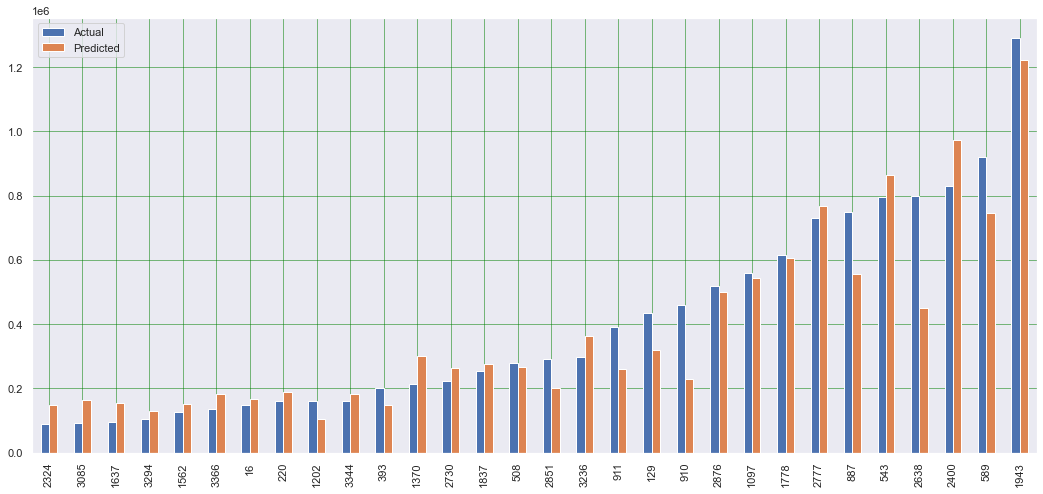

In [41]:
df_random_plot.plot(kind='bar',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Dataframe with score values

In [42]:
print(len(cv_results_rms))
print(len(R2))
print(len(adj_R2))
print(len(MAE))
print(len(MSE))
print(len(RMSE))
print(len(testing_score))
print(len(training_score))

1
1
1
1
1
1
1
1


In [43]:
df = pd.DataFrame({'model':['XGBR'],
                   'cv_results_rm':cv_results_rms, "R2": R2,'adj_R2': adj_R2, 'MAE': MAE,'MSE':MSE, 'RMSE':RMSE, 
                  'testing_score': testing_score, 'training_score': training_score})

df_sorted_models=df.sort_values(['testing_score','training_score'])

df_sorted_models

,model,cv_results_rm,R2,adj_R2,MAE,MSE,RMSE,testing_score,training_score
0,XGBR,-245665.754115,0.722207,0.720548,153351.27253,7.426542e+10,272516.819134,84.240869,84.240869


### Best model to choose is KN

In [44]:
import pickle

In [45]:
#Saving the Model
pickle_out = open("../Project/output/KN.pkl", "wb") 
pickle.dump(KN, pickle_out) 
pickle_out.close()